In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the JSON Files

In [2]:
#Directories to training data and json files 
train_dir='/Users/abhimanyuwadhwa/Desktop/QMUL/MScProject/DataSet/nsynth-train-all/examples-train-original.json'
valid_dir='/Users/abhimanyuwadhwa/Desktop/QMUL/MScProject/DataSet/nsynth-train-all/examples-valid-original.json'
test_dir='/Users/abhimanyuwadhwa/Desktop/QMUL/MScProject/DataSet/nsynth-train-all/examples-test-original.json'

In [3]:
#Loading the JSON files 
df_train= pd.read_json(train_dir, orient='index')
df_valid= pd.read_json(valid_dir, orient='index')
df_test= pd.read_json(test_dir, orient='index')

In [4]:
#Let us print the first two rows of the dataframe
df_train.head(2)

,note,sample_rate,pitch,instrument_source,instrument_family_str,instrument_str,note_str,qualities_str,instrument_source_str,velocity,instrument_family,instrument,qualities
guitar_acoustic_001-082-050,16629,16000,82,0,guitar,guitar_acoustic_001,guitar_acoustic_001-082-050,[percussive],acoustic,50,3,39,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
bass_synthetic_120-108-050,168243,16000,108,2,bass,bass_synthetic_120,bass_synthetic_120-108-050,[percussive],synthetic,50,0,881,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"


In [5]:
#printing the dimensions of the df
df_train.shape

(289205, 13)

In [6]:
#checking for missing values, if any
df_train.isna().any(axis=0)

note                     False
sample_rate              False
pitch                    False
instrument_source        False
instrument_family_str    False
instrument_str           False
note_str                 False
qualities_str            False
instrument_source_str    False
velocity                 False
instrument_family        False
instrument               False
qualities                False
dtype: bool

In [7]:
#a look at first two rows of the validation dataframe
df_valid.head(2)

,note_str,sample_rate,qualities_str,instrument_source,instrument_family_str,instrument_family,note,instrument_source_str,qualities,pitch,instrument_str,instrument,velocity
keyboard_acoustic_004-060-025,keyboard_acoustic_004-060-025,16000,"[dark, reverb]",0,keyboard,4,278915,acoustic,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0]",60,keyboard_acoustic_004,327,25
bass_synthetic_033-050-100,bass_synthetic_033-050-100,16000,[dark],2,bass,0,270361,synthetic,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",50,bass_synthetic_033,417,100


In [8]:
#printing it's dimensions
df_valid.shape

(12678, 13)

In [9]:
#checking for missing values, if any
df_valid.isna().any(axis=0)

note_str                 False
sample_rate              False
qualities_str            False
instrument_source        False
instrument_family_str    False
instrument_family        False
note                     False
instrument_source_str    False
qualities                False
pitch                    False
instrument_str           False
instrument               False
velocity                 False
dtype: bool

In [10]:
#repeating the same steps for test dataframe
df_test.head()

,qualities,pitch,note,instrument_source_str,velocity,instrument_str,instrument,sample_rate,qualities_str,instrument_source,note_str,instrument_family,instrument_family_str
bass_synthetic_068-049-025,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",49,217499,synthetic,25,bass_synthetic_068,656,16000,[dark],2,bass_synthetic_068-049-025,0,bass
keyboard_electronic_001-021-127,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",21,299359,electronic,127,keyboard_electronic_001,40,16000,[],1,keyboard_electronic_001-021-127,4,keyboard
guitar_acoustic_010-066-100,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",66,72288,acoustic,100,guitar_acoustic_010,219,16000,[],0,guitar_acoustic_010-066-100,3,guitar
reed_acoustic_037-068-127,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",68,22259,acoustic,127,reed_acoustic_037,387,16000,[reverb],0,reed_acoustic_037-068-127,7,reed
flute_acoustic_002-077-100,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",77,72001,acoustic,100,flute_acoustic_002,86,16000,[reverb],0,flute_acoustic_002-077-100,2,flute


In [11]:
df_test.shape

(4096, 13)

In [12]:
#checking for missing values, if any
df_test.isna().any(axis=0)

qualities                False
pitch                    False
note                     False
instrument_source_str    False
velocity                 False
instrument_str           False
instrument               False
sample_rate              False
qualities_str            False
instrument_source        False
note_str                 False
instrument_family        False
instrument_family_str    False
dtype: bool

In [14]:
#verifying whether the 'sample_rate' column in all three dataframes contains the same unique values
assert df_train['sample_rate'].unique()==df_valid['sample_rate'].unique() == df_test['sample_rate'].unique()

#we do not get an assertion error, which means the values are same

## Feature Distribution

 Instrument Families

Note ->
According to the original dataset, the 'instrument family' indices are given below:

Index 0 = bass

Index 1 = brass

Index 2 = flute

Index 3 = guitar

Index 4 = keyboard

Index 5 = mallet

Index 6 = organ

Index 7 = reed

Index 8 = string

Index 9 = synth_lead

Index 10 = vocal




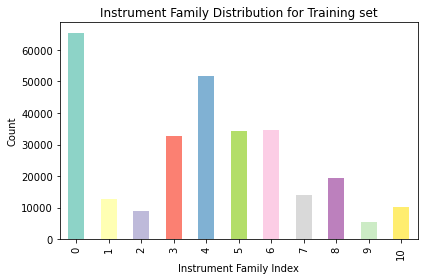

In [18]:
# Generating a list of distinct colors
colors = plt.cm.Set3(np.linspace(0, 1, 11))

# Plotting the bar chart with distinct colors
df_train['instrument_family'].value_counts().reindex(np.arange(0, 11, 1)).plot(kind='bar', color=colors, figsize=(6, 4))

# Setting the plot title, x-label, and y-label
plt.title("Instrument Family Distribution for Training set")
plt.xlabel("Instrument Family Index")
plt.ylabel("Count")
plt.tight_layout()

# plt.savefig("plots_JSON/dist_train.png")

# Displaying the plot
plt.show()

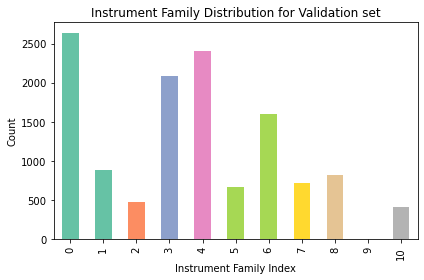

In [20]:
# Generating a list of different colors
colors = plt.cm.Set2(np.linspace(0, 1, 11))

# Plotting the bar chart with different colors
df_valid['instrument_family'].value_counts().reindex(np.arange(0, 11, 1)).plot(kind='bar', color=colors, figsize=(6, 4))

# Setting the plot title, x-label, and y-label
plt.title("Instrument Family Distribution for Validation set")
plt.xlabel("Instrument Family Index")
plt.ylabel("Count")
plt.tight_layout()

# plt.savefig("plots_JSON/dist_valid.png")

# Displaying the plot
plt.show()

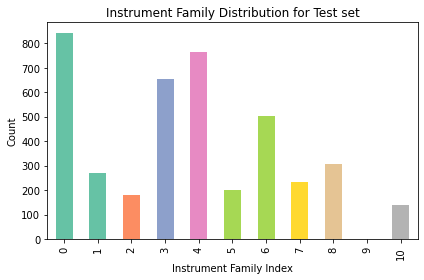

In [21]:
# Generating a list of different colors
colors = plt.cm.Set2(np.linspace(0, 1, 11))

# Plotting the bar chart with different colors
df_test['instrument_family'].value_counts().reindex(np.arange(0, 11, 1)).plot(kind='bar', color=colors, figsize=(6, 4))

# Setting the plot title, x-label, and y-label
plt.title("Instrument Family Distribution for Test set")
plt.xlabel("Instrument Family Index")
plt.ylabel("Count")
plt.tight_layout()

# plt.savefig("plots_JSON/dist_valid.png")

# Displaying the plot
plt.show()

The Sources

Note ->
According to the dataset, the 'source' indices for every audio file are represented below:

Index 0 = Acoustic

Index 1 = Electronic

Index 2 = Synthetic

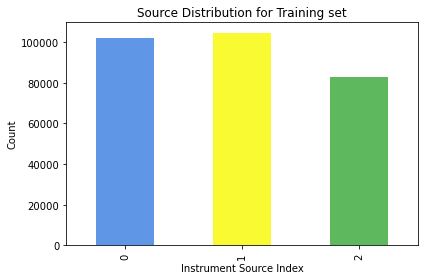

In [27]:
custom_palette = ['#6096e6', '#fafa33', '#5eb95e']

df_train['instrument_source'].value_counts().reindex(np.arange(0,3, 1)).plot(kind='bar', color=custom_palette, figsize=(6,4))
plt.title("Source Distribution for Training set")
plt.xlabel("Instrument Source Index")
plt.ylabel("Count")
plt.tight_layout()
#plt.savefig("plots_JSON/source_train.png")
plt.show()

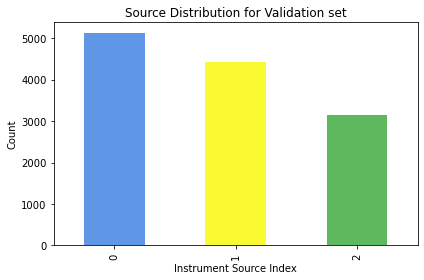

In [29]:
df_valid['instrument_source'].value_counts().reindex(np.arange(0,3, 1)).plot(kind='bar', color=custom_palette, figsize=(6,4))
plt.title("Source Distribution for Validation set")
plt.xlabel("Instrument Source Index")
plt.ylabel("Count")
plt.tight_layout()
#plt.savefig("plots_JSON/source_valid.png")
plt.show()

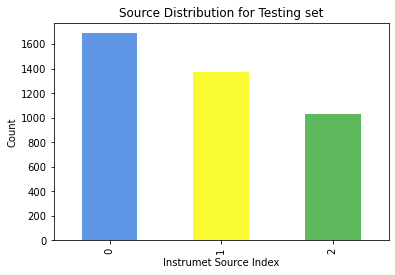

In [30]:
df_test['instrument_source'].value_counts().reindex(np.arange(0,3, 1)).plot(kind='bar', color=custom_palette, figsize=(6,4))
plt.title("Source Distribution for Testing set")
plt.xlabel("Instrumet Source Index")
plt.ylabel("Count")
#plt.savefig("plots_JSON/source_test.png")
plt.show()

## Statistics

Now, let us take a look at the statistics of each of our created dataframes.

In [31]:
#for the training set
df_train.describe()

,note,sample_rate,pitch,instrument_source,velocity,instrument_family,instrument
count,289205.000000,289205.0,289205.000000,289205.000000,289205.000000,289205.000000,289205.000000
mean,153095.048277,16000.0,62.311658,0.932370,76.172504,3.866462,490.943127
std,88232.549732,0.0,23.082522,0.796443,36.181410,2.843398,280.813189
min,0.000000,16000.0,9.000000,0.000000,25.000000,0.000000,0.000000
25%,76755.000000,16000.0,44.000000,0.000000,50.000000,1.000000,247.000000
50%,153254.000000,16000.0,62.000000,1.000000,75.000000,4.000000,499.000000
75%,229461.000000,16000.0,80.000000,2.000000,100.000000,6.000000,732.000000
max,305978.000000,16000.0,120.000000,2.000000,127.000000,10.000000,1005.000000


In [32]:
#for the test set
df_test.describe()

,pitch,note,velocity,instrument,sample_rate,instrument_source,instrument_family
count,4096.000000,4096.000000,4096.000000,4096.000000,4096.0,4096.000000,4096.000000
mean,61.480713,149040.895752,75.288574,423.497070,16000.0,0.840332,3.704590
std,23.386504,90014.146997,35.775118,300.198066,0.0,0.799813,2.761171
min,9.000000,87.000000,25.000000,8.000000,16000.0,0.000000,0.000000
25%,42.000000,70077.500000,50.000000,123.000000,16000.0,0.000000,1.000000
50%,61.000000,143984.500000,75.000000,417.000000,16000.0,1.000000,4.000000
75%,80.000000,228438.000000,100.000000,656.000000,16000.0,2.000000,6.000000
max,119.000000,305832.000000,127.000000,958.000000,16000.0,2.000000,10.000000


In [33]:
#for the validation set
df_valid.describe()

,sample_rate,instrument_source,instrument_family,note,pitch,instrument,velocity
count,12678.0,12678.000000,12678.000000,12678.000000,12678.000000,12678.000000,12678.000000
mean,16000.0,0.843193,3.642530,151895.227638,61.529894,435.214308,75.334516
std,0.0,0.791823,2.717627,89869.132754,23.543176,302.248923,35.996326
min,16000.0,0.000000,0.000000,8.000000,9.000000,8.000000,25.000000
25%,16000.0,0.000000,1.000000,72977.250000,42.000000,123.000000,50.000000
50%,16000.0,1.000000,4.000000,149368.500000,60.000000,417.000000,75.000000
75%,16000.0,1.000000,6.000000,230152.250000,80.000000,656.000000,100.000000
max,16000.0,2.000000,10.000000,305977.000000,120.000000,958.000000,127.000000


Let us explore how 'pitch' varies in all the three sets.

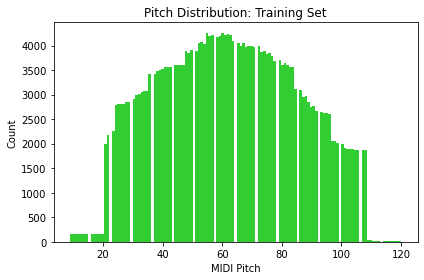

In [42]:
df_train.hist(column='pitch', grid=False, bins=127,figsize=(6,4), color='#32CD32')
plt.title("Pitch Distribution: Training Set")
plt.ylabel("Count")
plt.xlabel("MIDI Pitch")
plt.tight_layout()
#plt.savefig("plots_JSON/pitch_train")

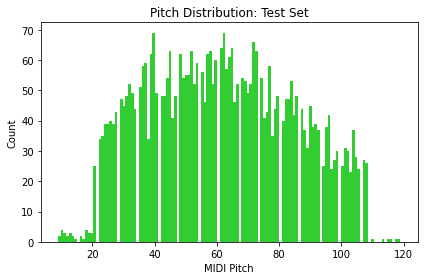

In [43]:
df_test.hist(column='pitch', grid=False, bins=127,figsize=(6,4), color='#32CD32')
plt.title("Pitch Distribution: Test Set")
plt.ylabel("Count")
plt.xlabel("MIDI Pitch")
plt.tight_layout()
#plt.savefig("plots_JSON/pitch_test")

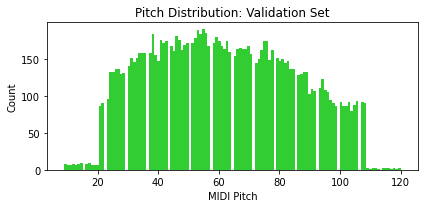

In [44]:
df_valid.hist(column='pitch', grid=False, bins=127,figsize=(6,3), color='#32CD32')
plt.title("Pitch Distribution: Validation Set")
plt.ylabel("Count")
plt.xlabel("MIDI Pitch")
plt.tight_layout()
#plt.savefig("plots_JSON/pitch_valid")

In [46]:
# let us confirm that the pitches in test and valid set are also present in training set
#confirm that  pitches in test and valid are also present in train
assert (set(df_valid['pitch'])).issubset((set(df_train['pitch'])))
assert (set(df_test['pitch'])).issubset((set(df_train['pitch'])))

#we do not get an assertion error